# Preventive Health Copilot — Prompt Evaluation Report

This report summarizes the evaluation of prompt performance using automated and rule-based scoring.

**Data Source:** `data/evaluation_results.csv`  
**Total Prompts Evaluated:** 10

Metrics used:
- Accuracy: Did the assistant include all expected keywords?
- Coherence: Was the response grammatically and logically sound?
- Completeness: Were all required concepts covered?
- User-Friendliness: Was the tone natural and helpful?


In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 Load Prompt & Evaluation Data
 

In [16]:
df=pd.read_csv('..\\data\\evaluation_results.csv')

In [4]:
df.head()

,Prompt,Response,Expected Keywords,Expected Tools,Accuracy,Coherence,Completeness,User-Friendliness,Reasoning Used,Score (0–5)
0,What should I eat for lunch to lose weight?,## Step 1: Identify the task\nThe task is to f...,"fiber,vegetables,protein","Nutritionix,get_diet_tip",Yes,Yes,Yes,Yes,Yes,4.0
1,Remind me to drink water at 10am,## Health Reminder: Drink Water\nYou have been...,Reminder set,mock_schedule_reminder,No,No,No,Yes,No,1.0
2,Give me a healthy snack idea.,## Healthy Snack Idea\nA healthy snack idea is...,"snack,healthy,nuts",get_diet_tip,No,Yes,No,Yes,No,2.0
3,What are some high protein vegetarian meals?,### High Protein Vegetarian Meals\n\nHere are ...,"protein,vegetarian",Nutritionix,Yes,Yes,Yes,Yes,No,4.0
4,Suggest a healthy breakfast,## Step 1: Introduction to Healthy Breakfast\n...,"fiber,breakfast,protein","get_diet_tip,Nutritionix",Yes,Yes,Yes,Yes,Yes,4.0


In [5]:
df.columns = df.columns.str.replace("–", "-", regex=False).str.strip()


In [6]:
df.keys()

Index(['Prompt', 'Response', 'Expected Keywords', 'Expected Tools', 'Accuracy',
       'Coherence', 'Completeness', 'User-Friendliness', 'Reasoning Used',
       'Score (0-5)'],
      dtype='object')

Display Summary Stats


In [7]:
summary = {
    "Total Prompts": len(df),
    "Avg Score": df["Score (0-5)"].mean().round(2),
    "Accuracy %": (df["Accuracy"] == "✅").mean() * 100,
    "Coherence %": (df["Coherence"] == "✅").mean() * 100,
    "Completeness %": (df["Completeness"] == "✅").mean() * 100,
    "User-Friendliness %": (df["User-Friendliness"] == "✅").mean() * 100,
}
pd.DataFrame(summary, index=["Metric"])


,Total Prompts,Avg Score,Accuracy %,Coherence %,Completeness %,User-Friendliness %
Metric,11,3.0,0.0,0.0,0.0,0.0


Visualize Score Distribution

C:\Users\saikr\AppData\Local\Temp\ipykernel_5476\3951358003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Score (0-5)", palette="Blues")


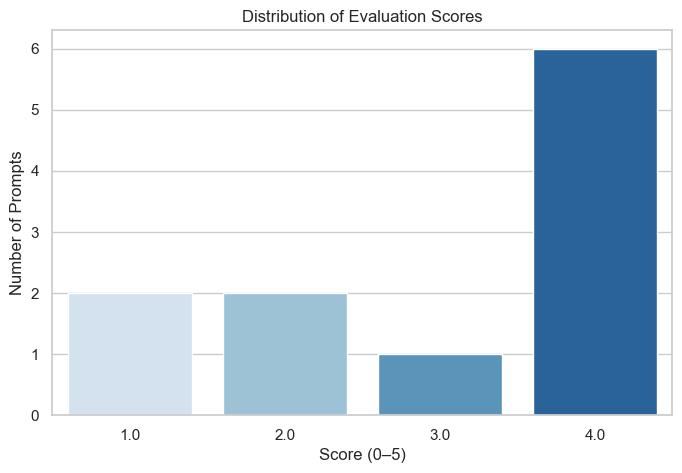

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Score (0-5)", palette="Blues")
plt.title("Distribution of Evaluation Scores")
plt.xlabel("Score (0–5)")
plt.ylabel("Number of Prompts")
plt.show()

Show Pass/Fail Matrix (Heatmap)


In [9]:
# Map all possible pass/fail indicators to 1 or 0
def convert_to_binary(val):
    if str(val).strip().lower() in ["✅", "yes", "1"]:
        return 1
    elif str(val).strip().lower() in ["❌", "no", "0"]:
        return 0
    return np.nan  # mark anything else as missing

# Apply to specific columns
cols = ["Accuracy", "Coherence", "Completeness", "User-Friendliness"]
heat_data = df[cols].applymap(convert_to_binary)


C:\Users\saikr\AppData\Local\Temp\ipykernel_5476\746031880.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heat_data = df[cols].applymap(convert_to_binary)


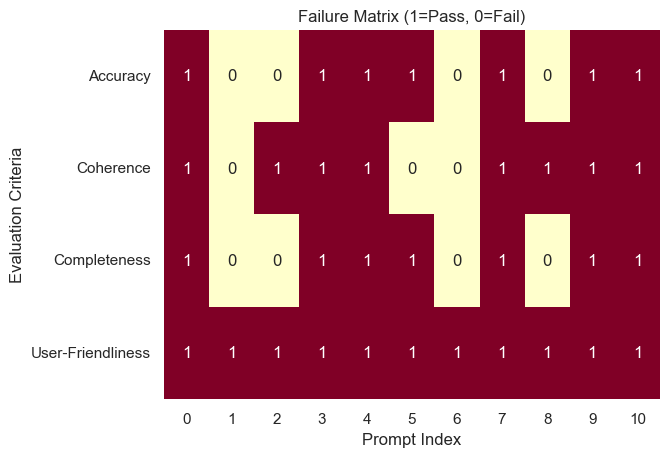

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(heat_data.T, cmap="YlOrRd", cbar=False, annot=True)
plt.title("Failure Matrix (1=Pass, 0=Fail)")
plt.xlabel("Prompt Index")
plt.ylabel("Evaluation Criteria")
plt.show()


Highlight Low-Performing Prompts


In [11]:
weak_prompts = df[df["Score (0-5)"] <= 3]
weak_prompts[["Prompt", "Score (0-5)", "Accuracy", "Completeness", "User-Friendliness"]]


,Prompt,Score (0-5),Accuracy,Completeness,User-Friendliness
1,Remind me to drink water at 10am,1.0,No,No,Yes
2,Give me a healthy snack idea.,2.0,No,No,Yes
5,Track calories for 2 bananas and a boiled egg,3.0,Yes,Yes,Yes
6,Remind me to walk every day at 7pm,1.0,No,No,Yes
8,Healthy dinner for weight loss,2.0,No,No,Yes


In [12]:
from collections import Counter
import csv

with open("../data/prompts.csv") as f:
    reader = csv.DictReader(f)
    tools = [t.strip() for row in reader for t in row["Expected Tools"].split(",")]

tool_counts = Counter(tools)
pd.DataFrame.from_dict(tool_counts, orient='index', columns=["Used In Prompts"]).sort_values("Used In Prompts", ascending=False)


,Used In Prompts
Nutritionix,5
get_diet_tip,5
mock_schedule_reminder,3
OpenFoodFacts,1


Correlation Between Metrics


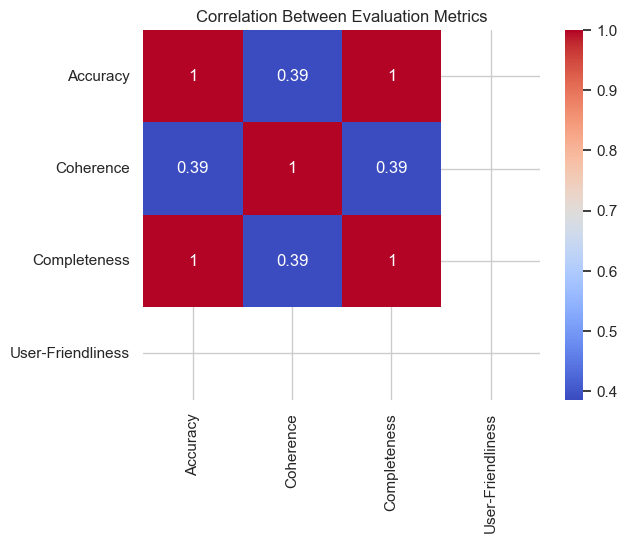

In [13]:
correlation = heat_data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Between Evaluation Metrics")
plt.show()
